# Basics Statistical Tools

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math
import random
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
file = 'C:\\Users\\ryanl\\OneDrive\\Desktop\\Python\\Data Analysts\\Applied Statistics\\Data\\data.csv'
df = pd.read_csv(file)

cat_file = 'C:\\Users\\ryanl\\OneDrive\\Desktop\\Python\\Data Analysts\\Applied Statistics\\Data\\categorical_data.csv'
df_cat = pd.read_csv(cat_file)

numerical = 'C:\\Users\\ryanl\\OneDrive\\Desktop\\Python\\Data Analysts\\Applied Statistics\\Data\\data.csv'
categorical = 'C:\\Users\\ryanl\\OneDrive\\Desktop\\Python\\Data Analysts\\Applied Statistics\\Data\\multiple_variables.csv'
df1 = pd.read_csv(numerical)
df2 = pd.read_csv(categorical)
df2['height'] = df1['height']

file = 'C:\\Users\\ryanl\\OneDrive\\Desktop\\Python\\Data Analysts\\Applied Statistics\\Data\\categorical_data.csv'
data = pd.read_csv(file)
df_time = pd.DataFrame()
df_time['design'] = data['Churn'].map({'No': 'A', 'Yes': 'B'})
df_time['time'] = data['MonthlyCharges']
df_time['time'] = np.where(df_time['design']=='A', df_time.time+12, df_time.time)

sampleA = df_time[df_time.design == 'A'].time
sampleB = df_time[df_time.design == 'B'].time
idx_C = set(random.sample(range(5174), 3418))
idx_A = set(range(5174)) - idx_C
sampleC = sampleA.iloc[list(idx_C)]
sampleA = sampleA.iloc[list(idx_A)]
idx_D = set(random.sample(range(3418), 1260))
idx_C = set(range(3418)) - idx_D
sampleD = sampleC.iloc[list(idx_D)]
sampleC = sampleC.iloc[list(idx_C)]
total_sample = sampleA.append(sampleB).append(sampleC).append(sampleD)
design = ['A']*1756 + ['B']*1868 + ['C']*2157 + ['D']*1262
df2_2 = pd.DataFrame(columns=['design','time'])
df2_2['time'] = total_sample
df2_2['design'] = design

## Basic Statistics

In [4]:
#trimmed mean
from scipy.stats import trim_mean
trim_mean(df['height'], 0.1)

67.92025

In [5]:
#weighted mean
np.average(df['height'], weights=df['weight']) 

68.05087870057015

In [6]:
#weighted median
import wquantiles
wquantiles.median(df['height'], weights=df['weight'])

68.01474446202532

In [7]:
#mode
from scipy import stats
stats.mode(df['height'])

ModeResult(mode=array([65.18]), count=array([3]))

In [8]:
#covariance
np.cov(df['height'],df['weight'])[0][1]

12.924049638190953

In [9]:
#pearson's coefficient
from scipy.stats import pearsonr
pearsonr(df['height'],df['weight'])[0]
#np.corrcoef(df['height'],df['weight'])[0][1]

0.5568647346122995

## Plots and Tables

In [10]:
#contingency table
pd.crosstab(df2['Rating'], df2['Division Name'])

Division Name,General,General Petite,Initmates
Rating,,,
neutral,1773,943,155
satisfied,3014,1748,315
unsatisfied,960,528,77
very satisfied,7612,4604,901
very unsatisfied,491,297,54


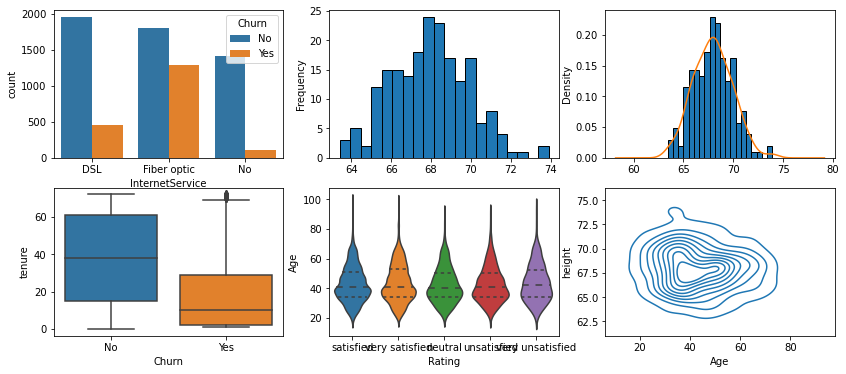

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,6))

#bar chart, count plot
sns.countplot(x='InternetService', hue='Churn', data=df_cat, ax=axes[0,0])

#histogram
df['height'].plot.hist(bins=20, edgecolor='black', ax=axes[0,1])


#density plot
df['height'].plot.hist(density=True, bins=20, edgecolor='black', ax=axes[0,2])
df['height'].plot.density(ax=axes[0,2])

#box plot
sns.boxplot(data=df_cat, x='Churn', y='tenure', ax=axes[1,0])

#violin plot
sns.violinplot(x=df2.Rating, y=df2.Age, inner='quartile', ax=axes[1,1])

#contour plot
sns.kdeplot(x=df2.Age, y=df2.height, ax=axes[1,2])

plt.show()

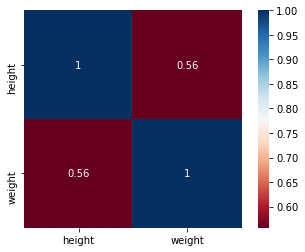

In [12]:
#heat map
corr = df.corr()    
sns.heatmap(corr, cmap = "RdBu", square=True, annot=True)
plt.show()

## Sampling Random Variables

In [13]:
#uniform between 0 and 1
np.random.random(5)

array([0.0351624 , 0.40779213, 0.13028699, 0.42180335, 0.35564728])

In [14]:
#uniform distribution
nums = [5,6,7,8,9]
n = 3
prob = [0.2,0.3,0.1,0.3,0.1]
np.random.choice(nums, n, p=prob, replace=True)

array([5, 8, 5])

In [15]:
#binomial distribution
n = 100
p = 0.2
sample_size = 3
successful = np.random.binomial(n, p, sample_size)
print(successful)

[20 28 17]


In [16]:
#standard normal distribution
sample_size = 3
samples = np.random.standard_normal(size=sample_size)
print(samples)

[ 0.76367116  1.23070605 -1.14069142]


In [17]:
#normal distribution
mean = 10
sigma = 0.1
sample_size = 3
samples = np.random.normal(mean, sigma, size=sample_size)
print(samples)

[ 9.99667006 10.1473391   9.98884133]


In [18]:
#poisson distribution
mean = 10
sample_size = 3
samples = np.random.poisson(mean, size=sample_size)
print(samples)

[12  7  8]


## Probability Distributions

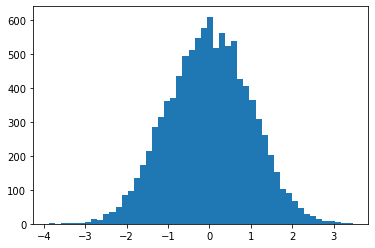

0.391 0.5793 0.2


In [19]:
#normal distribution
sample_size = 10000
samples = np.random.standard_normal(size=sample_size)
plt.hist(samples, bins=50)
plt.show()

mu, sigma = 0, 1
#probability of a sample is = 2
p = stats.norm.pdf(x=0.2, loc=mu, scale=sigma)
#probability of a sample is <= 2
P = stats.norm.cdf(x=0.2, loc=mu, scale=sigma)
#the z-score where there is a probability of P that a standardised sample would fall below
z_score = stats.norm.ppf(P, loc=mu, scale=sigma)
print(round(p,4), round(P,4), round(z_score,4))

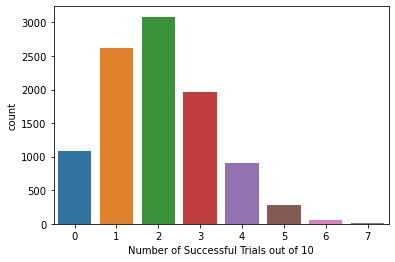

0.0875 0.9676
0.0881 0.9672 4.0


In [20]:
#binomial distrubtion
successful = np.random.binomial(10, 0.2, size=10000)
sns.countplot(x=successful)
plt.xlabel('Number of Successful Trials out of 10')
plt.show()

#take 10000 samples, each sample contains 10 trails with a 20% probability of success
successful = np.random.binomial(10, 0.2, size=10000)
#percentage of the 1000 samples that there are =4 and <=4 successful trails
p = np.mean(successful == 4)
P = np.mean(successful <= 4)
print(p,P)

n_trials, p_success, n_success = 10, 0.2, 4
p = stats.binom.pmf(n_success, n=n_trials, p=p_success)
P = stats.binom.cdf(n_success, n=n_trials, p=p_success)
score = stats.binom.ppf(P, n=n_trials, p=p_success)
print(round(p,4), round(P,4), round(score,4))

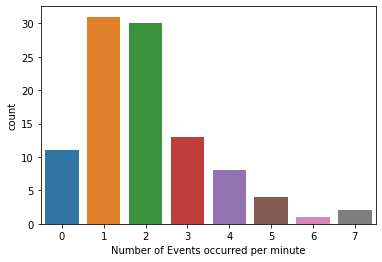

0.0902 0.9473 4.0


In [21]:
#poisson distribution
samples = stats.poisson.rvs(2, size=100)
sns.countplot(x=samples)
plt.xlabel('Number of Events occurred per minute')
plt.show()

p = stats.poisson.pmf(4, mu=2)
P = stats.poisson.cdf(4, mu=2)
score = stats.poisson.ppf(P, mu=2)
print(round(p,4), round(P,4), round(score,4))

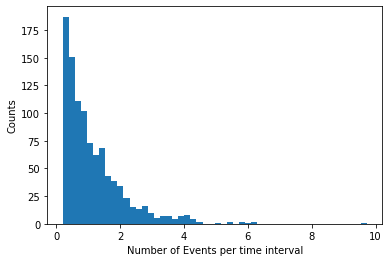

0.7408 0.2592 0.5


In [22]:
#exponential distribution
samples = stats.expon.rvs(0.2, size=1000)
plt.hist(samples, bins=50)
plt.ylabel('Counts')
plt.xlabel('Number of Events per time interval')
plt.show()

p = stats.expon.pdf(0.5, loc=0.2, scale=1)
P = stats.expon.cdf(0.5, loc=0.2, scale=1)
score = stats.expon.ppf(P, loc=0.2, scale=1)
print(round(p,4), round(P,4), round(score,4))

In [23]:
#student's t-distribution
dof = 2
t_score = stats.t.ppf(0.05, df=dof-1)
p = stats.t.pdf(t_score, df=dof-1)
P = stats.t.cdf(t_score, df=dof-1)
print(round(p,4), round(P,4), round(t_score,4))

0.0078 0.05 -6.3138


In [24]:
#chi-sqaure distribution
dof = 2
p = stats.chi2.pdf(0.2, df=dof-1)
P = stats.chi2.cdf(0.2, df=dof-1)
chi2_score = stats.chi2.ppf(P, df=dof-1)
print(round(p,4), round(P,4), round(chi2_score,4))

0.8072 0.3453 0.2


## Significance Test

<div>
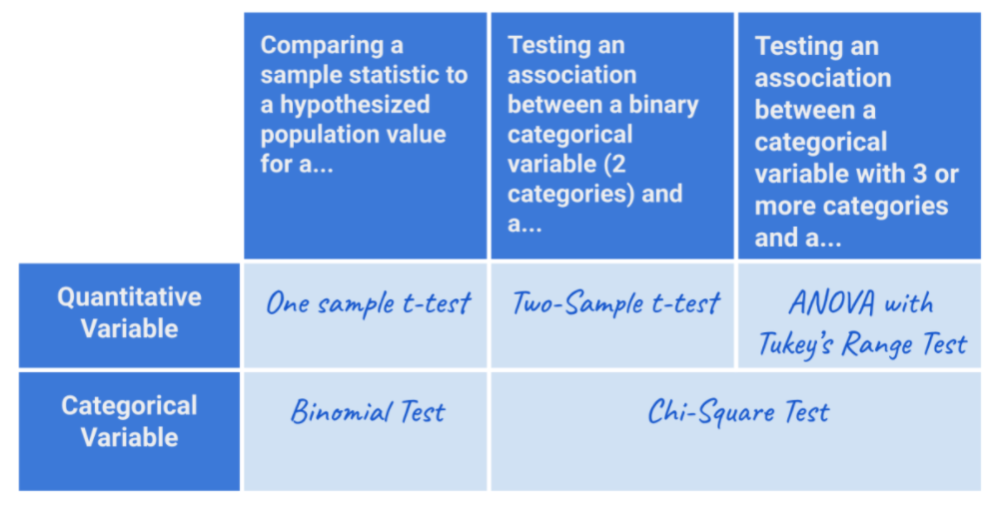
</div>

In [25]:
#1-sample t-test
expected_mean = 74
t_stat, p_value = stats.ttest_1samp(sampleA, expected_mean)
print(f'The p-value for a single sided test is {round(p_value/2, 4)}.')

The p-value for a single sided test is 0.2162.


In [28]:
#2-sample t-test: whether the means of the two variables are the same
t_stat, p_value = stats.ttest_ind(sampleA, sampleB, equal_var=False)
print(f'The p-value for a single sided test is {round(p_value/2, 4)}.')

The p-value for a single sided test is 0.137.


In [27]:
#ANOVA: whether the means of multiple variables are the same
model = smf.ols('time ~ design', data=df2_2).fit()
aov_table = sm.stats.anova_lm(model)
display(aov_table)
Fstat, p_value = stats.f_oneway(sampleA, sampleB, sampleC, sampleD)
print(f'p-value: {round(p_value, 4)}')

,df,sum_sq,mean_sq,F,PR(>F)
design,3.0,3.799452e+03,1266.483985,1.452953,0.225329
Residual,7039.0,6.135630e+06,871.662145,NaN,NaN


p-value: 0.2167


In [81]:
#chi-square test: null hypothesis suggests independence between two varaibles
table = pd.crosstab(df2['Rating'], df2['Division Name'])
chi2, p_value, dof, expected = stats.chi2_contingency(table)
print(f'p-value: {round(p_value, 4)}')

p-value: 0.001


In [82]:
#binomial test
positive_observation = 43
sample_size = 500
expected_frequency = 0.1
p_value_2sided = stats.binom_test(positive_observation, sample_size, expected_frequency)
p_value_1sided = stats.binom_test(positive_observation, sample_size, expected_frequency, alternative = 'less')
print(f'There is a {100*round(p_value_1sided,3)}% chance of observing less than {positive_observation} positive outcomes out of {sample_size} tests with an expected frequency of {0.1}.')

There is a 16.6% chance of observing less than 43 positive outcomes out of 500 tests with an expected frequency of 0.1.


## Sample Size Calculator

In [90]:
#standard calculator
def sample_size_calculator(alpha, beta, sigma, delta):
    z_half_alpha = stats.norm.ppf(alpha/2)
    z_beta = stats.norm.ppf(beta)
    return round((sigma**2)*((z_half_alpha+z_beta)**2)/(delta**2))

alpha = 0.05 #significance level
beta = 0.2 #probabilty of type 2 error
sigma = 3 #standard deviation calculated from historical data
delta = 0.25 #minimum detectable effect (percentage)
sample_size_calculator(alpha, beta, sigma, delta)

1130

In [91]:
#if the test statistic is a ratio
def percentage_sample_size_calculator(alpha, beta, p1, p2):
    term1 = stats.norm.ppf(alpha/2)*np.sqrt((p1+p2)*(1-0.5*(p1+p2)))
    term2 = stats.norm.ppf(beta)*np.sqrt(p1*(1-p1)+p2*(1-p2))
    return round(((term1+term2)**2)/((p1-p2)**2))
alpha = 0.05 #significance level
beta = 0.2 #probabilty of type 2 error
p1 = 0.2 #baseline conversion rate
p2 = 0.25 #expected conversion rate
percentage_sample_size_calculator(alpha, beta, p1, p2)

1094

In [93]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize as es
n = zt_ind_solve_power(effect_size=es(prop1=p1, prop2=p2), alpha=alpha, power=1-beta, alternative="two-sided")
round(n)

1092